In [1]:
library(readxl)
library(phytools)
# library(paleotree)
library(caper)
library(bestNormalize)

Loading required package: ape

Loading required package: maps

Loading required package: MASS

Loading required package: mvtnorm


Attaching package: ‘bestNormalize’


The following object is masked from ‘package:MASS’:

    boxcox




In [2]:
t <- read.tree("fungi_115_timetree_basidiomycota.nwk")
nt <- t
# set zero-length branches to be 1/1000000 total tree length
# http://blog.phytools.org/2015/06/update-to-rerootingmethod-for-ancestral.html
nt$edge.length[nt$edge.length==0] <- max(nodeHeights(t))*1e-6

In [3]:
d <- read.csv('stat.txt', sep='\t')
head(d)

,species,taxid,genome,organism_name,assembly_level,genome_size,num_CDS,num_introns,sum_CDS_length,sum_intron_length,intron_per_kb
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,Eremothecium_gossypii,1034331,Ashbya_gossypii_fdag1.ASM96883v1,Eremothecium gossypii FDAG1,Complete Genome,9157154,4759,270,7003446,28117,0.0385524
2,Saccharomyces_cerevisiae,559292,Saccharomyces_cerevisiae.R64-1-1,Saccharomyces cerevisiae S288C,Complete Genome,12157105,6619,282,8801211,111916,0.0320410
3,Thielavia_terrestris,578455,Thielavia_terrestris_nrrl_8126.ASM22611v1,Thielavia terrestris NRRL 8126,Complete Genome,36912256,9802,17290,13641909,1958465,1.2674200
4,Verticillium_dahliae,1202531,Verticillium_dahliaejr2.GCA_000400815.2,Verticillium dahliae JR2,Complete Genome,36150287,11424,16261,15594541,1486506,1.0427400
5,Agaricus_bisporus,936046,Agaricus_bisporus_var_bisporus_h97.Agabi_varbisH97_2,Agaricus bisporus var. bisporus H97,Chromosome,30233745,10441,50790,13351824,3487144,3.8039700
6,Aspergillus_nidulans,227321,Aspergillus_nidulans.ASM1142v1,Aspergillus nidulans FGSC A4,Chromosome,29925798,10533,24460,15266724,2186566,1.6021800


Warning message in orderNorm(d$intron_per_kb):
“Ties in data, Normal distribution not guaranteed
”


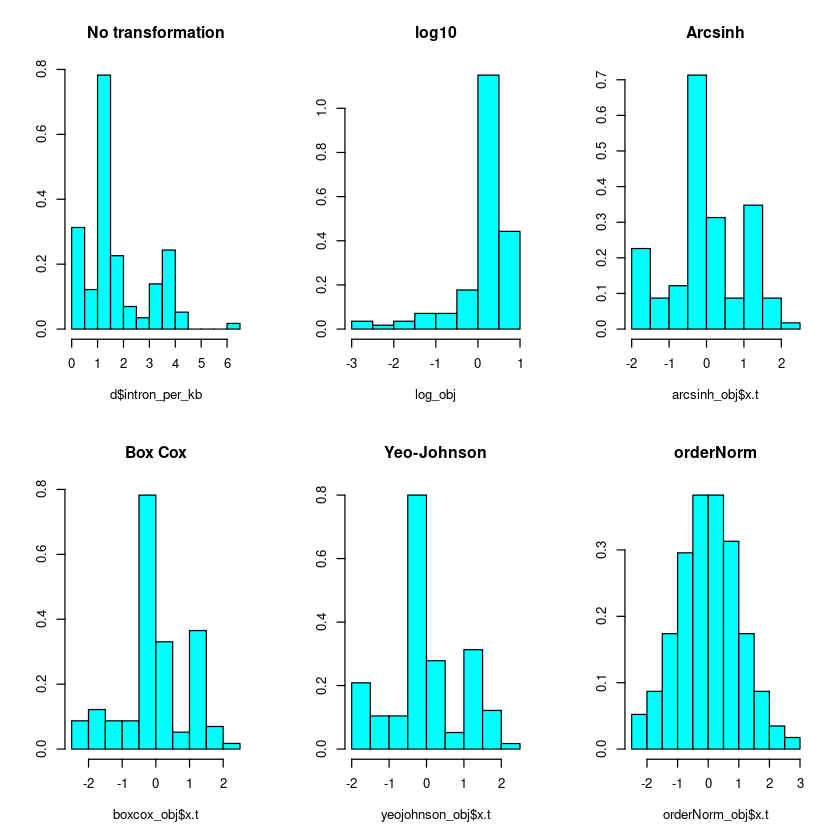

In [4]:
# trying different transformations
# intron_per_kb
log_obj <- log10(d$intron_per_kb)
arcsinh_obj <- arcsinh_x(d$intron_per_kb)
boxcox_obj <- boxcox(d$intron_per_kb + 0.001)
yeojohnson_obj <- yeojohnson(d$intron_per_kb)
orderNorm_obj <- orderNorm(d$intron_per_kb)
par(mfrow = c(2,3))
MASS::truehist(d$intron_per_kb, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”


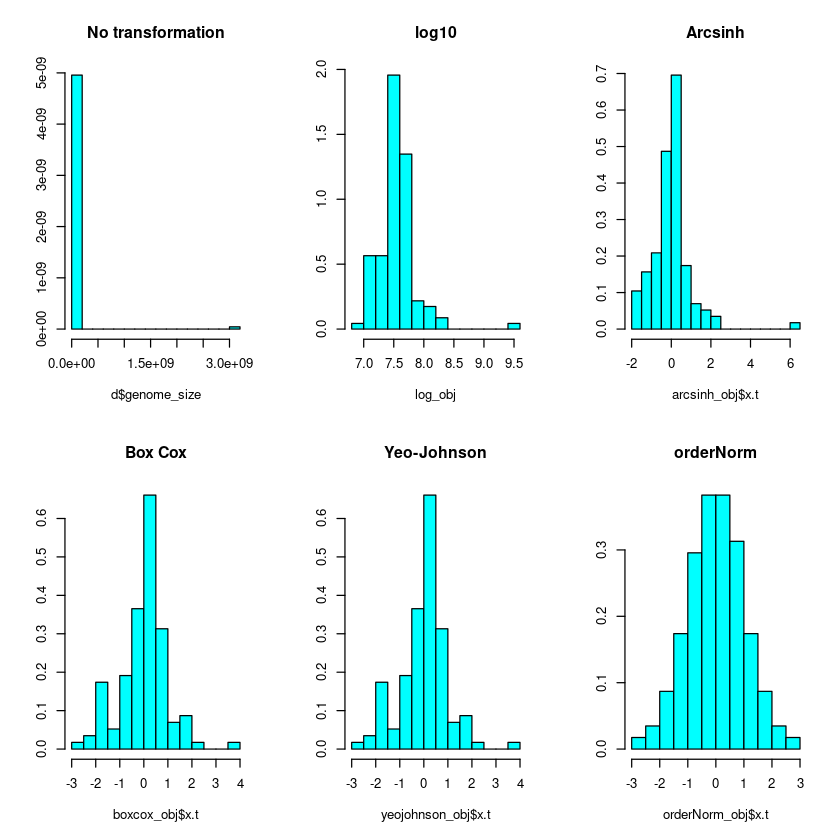

In [5]:
# genome_size
log_obj <- log10(d$genome_size)
arcsinh_obj <- arcsinh_x(d$genome_size)
boxcox_obj <- boxcox(d$genome_size)
yeojohnson_obj <- yeojohnson(d$genome_size)
orderNorm_obj <- orderNorm(d$genome_size)
par(mfrow = c(2,3))
MASS::truehist(d$genome_size, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

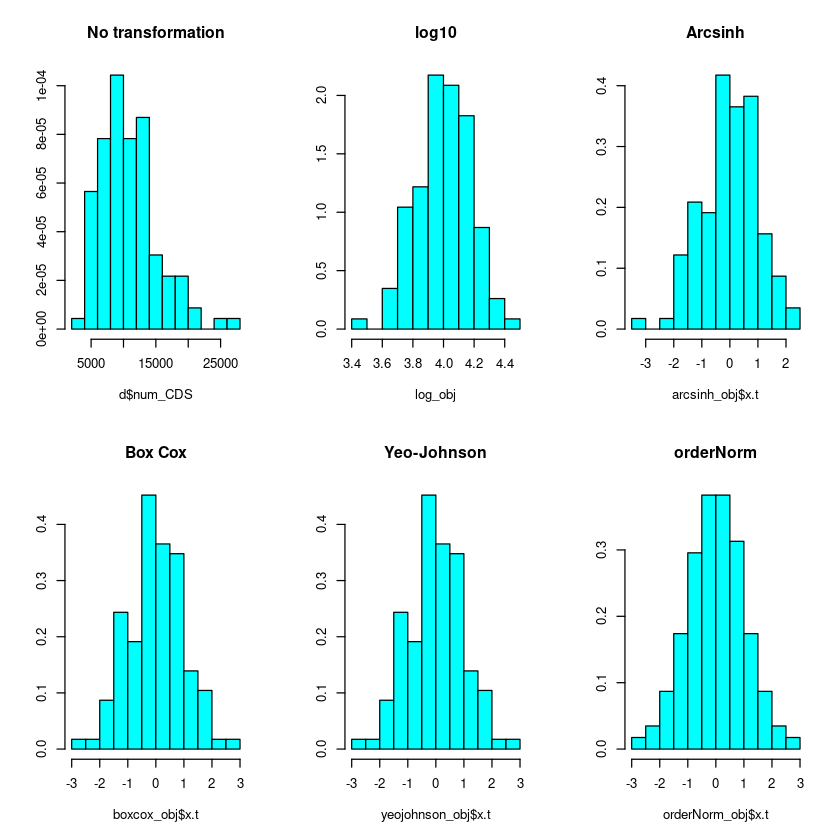

In [6]:
# num_CDS
log_obj <- log10(d$num_CDS)
arcsinh_obj <- arcsinh_x(d$num_CDS)
boxcox_obj <- boxcox(d$num_CDS)
yeojohnson_obj <- yeojohnson(d$num_CDS)
orderNorm_obj <- orderNorm(d$num_CDS)
par(mfrow = c(2,3))
MASS::truehist(d$num_CDS, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

Warning message in orderNorm(d$num_introns + 1):
“Ties in data, Normal distribution not guaranteed
”


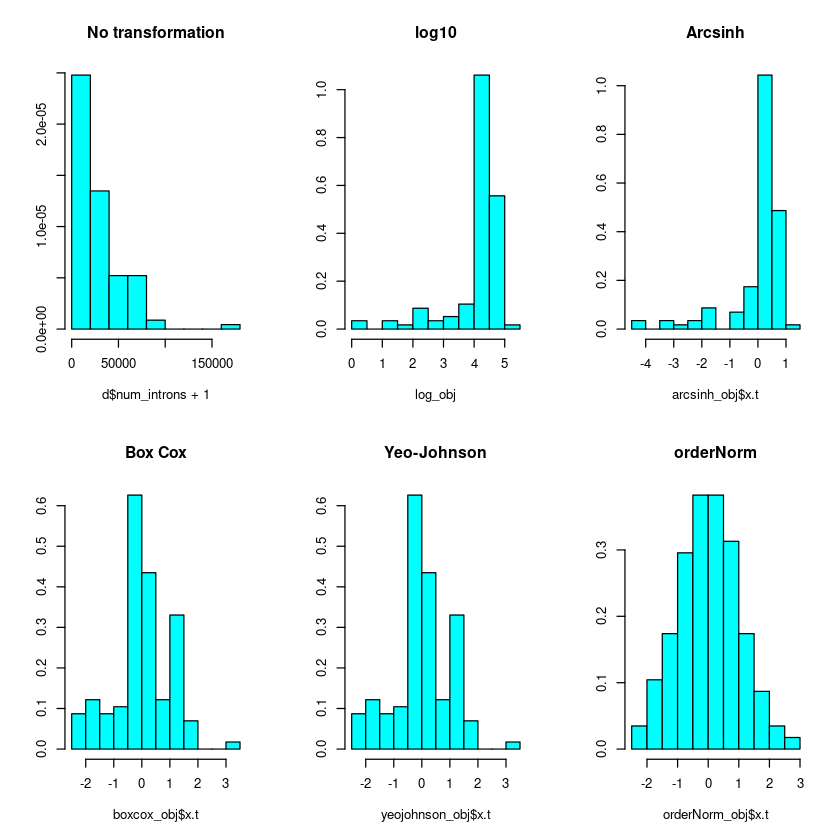

In [7]:
# num_introns
log_obj <- log10(d$num_introns + 1)
arcsinh_obj <- arcsinh_x(d$num_introns + 1)
boxcox_obj <- boxcox(d$num_introns + 1)
yeojohnson_obj <- yeojohnson(d$num_introns + 1)
orderNorm_obj <- orderNorm(d$num_introns + 1)
par(mfrow = c(2,3))
MASS::truehist(d$num_introns + 1, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”


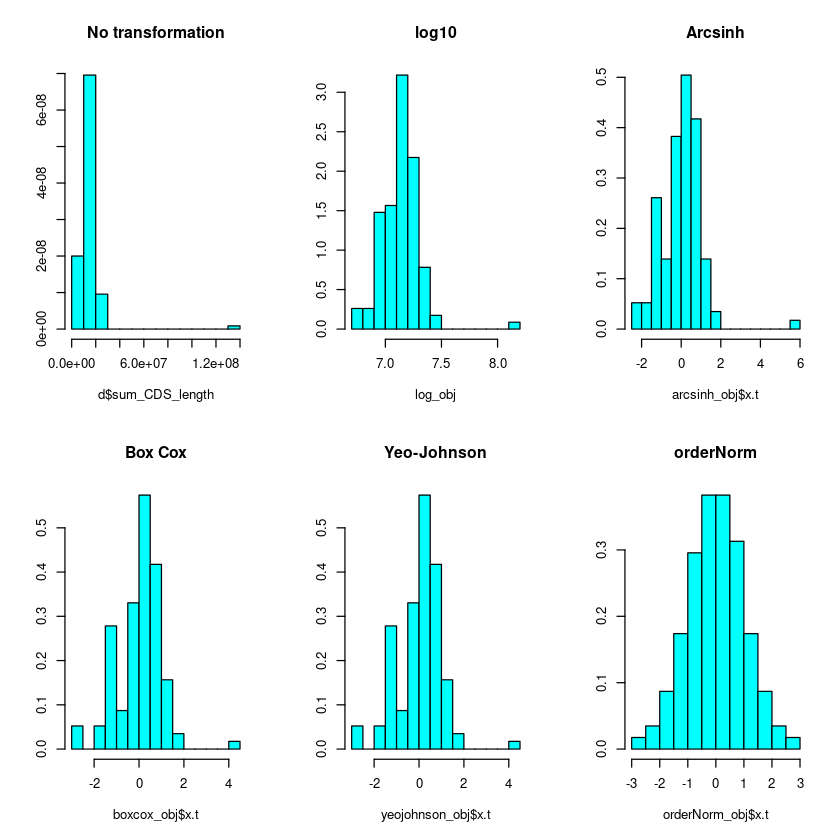

In [8]:
# sum_CDS_length
log_obj <- log10(d$sum_CDS_length)
arcsinh_obj <- arcsinh_x(d$sum_CDS_length)
boxcox_obj <- boxcox(d$sum_CDS_length)
yeojohnson_obj <- yeojohnson(d$sum_CDS_length)
orderNorm_obj <- orderNorm(d$sum_CDS_length)
par(mfrow = c(2,3))
MASS::truehist(d$sum_CDS_length, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

Warning message in orderNorm(d$sum_intron_length + 1):
“Ties in data, Normal distribution not guaranteed
”


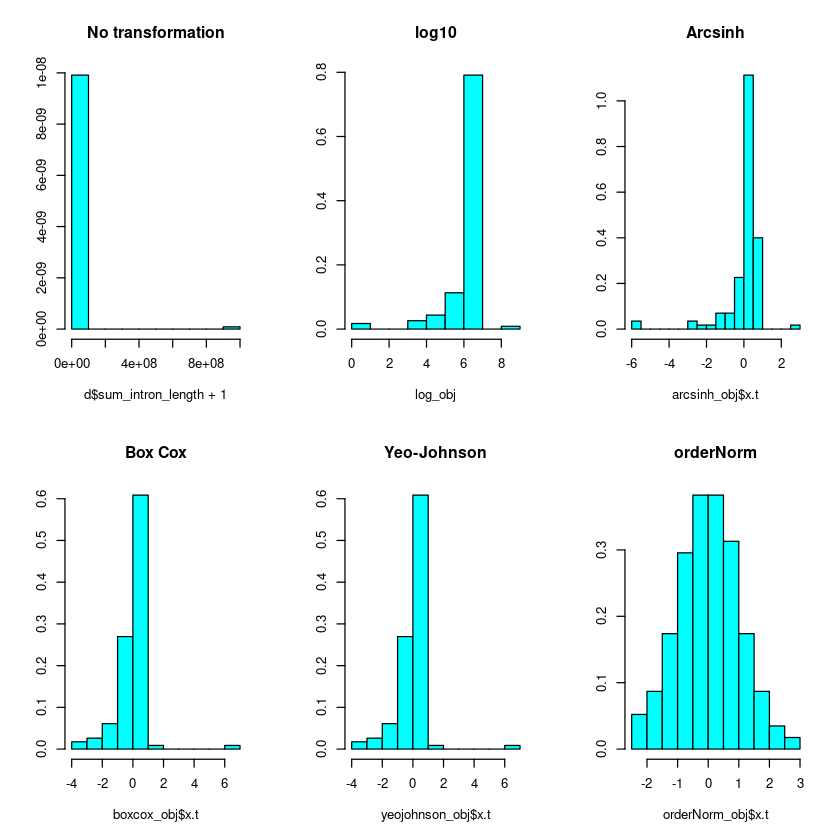

In [9]:
# sum_intron_length + 1
log_obj <- log10(d$sum_intron_length + 1)
arcsinh_obj <- arcsinh_x(d$sum_intron_length + 1)
boxcox_obj <- boxcox(d$sum_intron_length + 1)
yeojohnson_obj <- yeojohnson(d$sum_intron_length + 1)
orderNorm_obj <- orderNorm(d$sum_intron_length + 1)
par(mfrow = c(2,3))
MASS::truehist(d$sum_intron_length + 1, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

In [10]:
# boxcox transformation
d$bc_genome_size <- (boxcox(d$genome_size))$x.t
d$bc_intron_per_kb <- (boxcox(d$intron_per_kb + 0.001))$x.t
d$bc_num_CDS <- (boxcox(d$num_CDS))$x.t
d$bc_num_introns <- (boxcox(d$num_introns + 1))$x.t
d$bc_sum_CDS_length <- (boxcox(d$sum_CDS_length))$x.t
d$bc_sum_intron_length <- (boxcox(d$sum_intron_length + 1))$x.t


Excluding 1 contrast with absolute studentised residuals > 3

bc_num_introns :
       Estimate  Std. Error t value Pr(>|t|)  
NV  -0.00918690  0.00470223 -1.9537  0.06079 .
SD   0.00154083  0.00071856  2.1443  0.04083 *
AGE  0.00728634  0.00571532  1.2749  0.21283  

bc_num_CDS :
      Estimate Std. Error t value Pr(>|t|)
NV  -0.0109403  0.0148042 -0.7390   0.4661
SD   0.0013974  0.0021816  0.6405   0.5270
AGE  0.0121954  0.0165025  0.7390   0.4661

---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

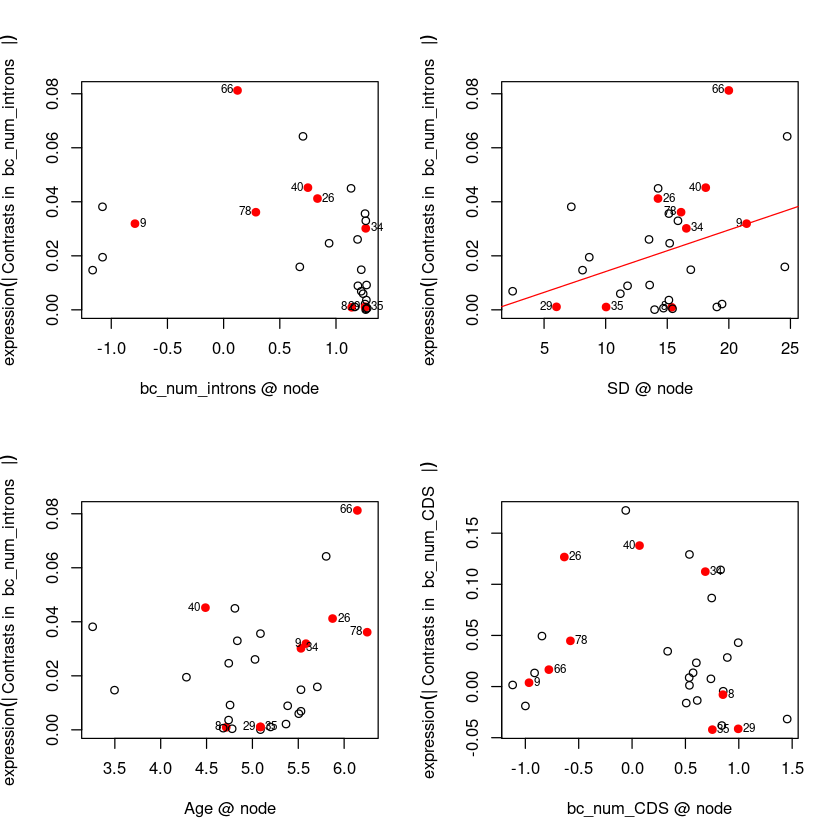

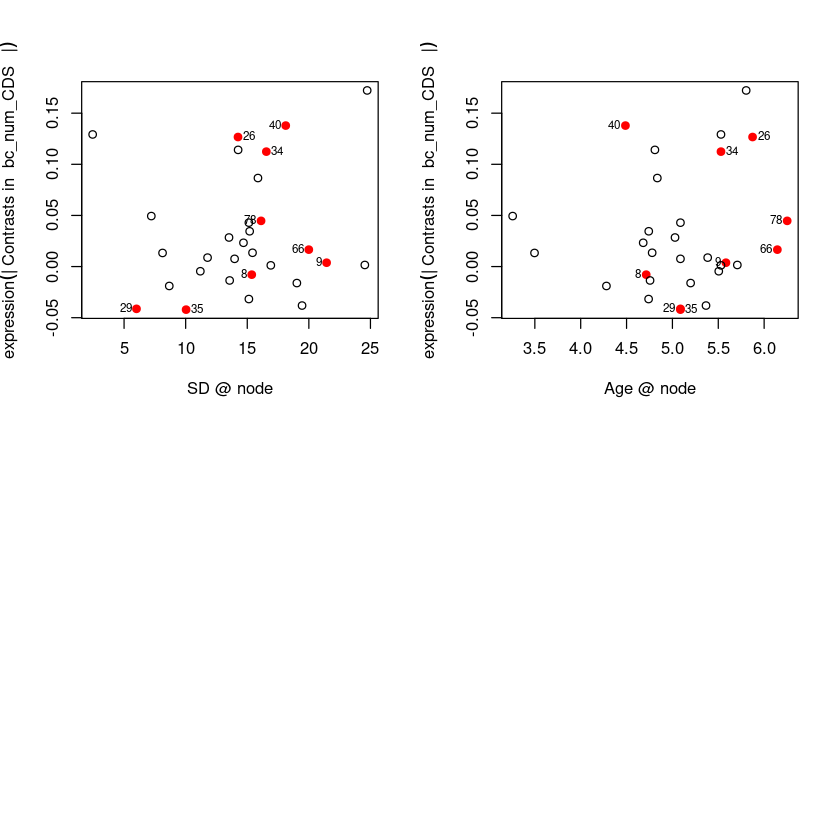

In [11]:
# phylogenetic independent contrasts
df <- comparative.data(nt, d, taxid)
bc <- crunch(bc_genome_size ~ bc_num_introns + bc_num_CDS, data=df)
crunchMod <- caic.robust(bc)
par(mfrow=c(2,2))
caic.diagnostics(crunchMod, outlier=1)

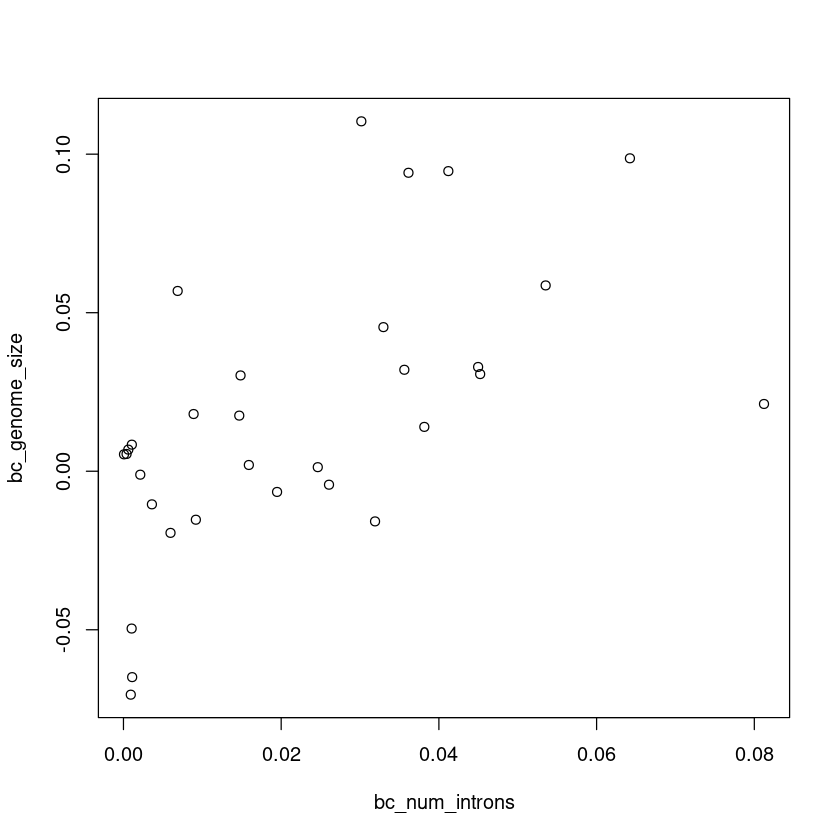

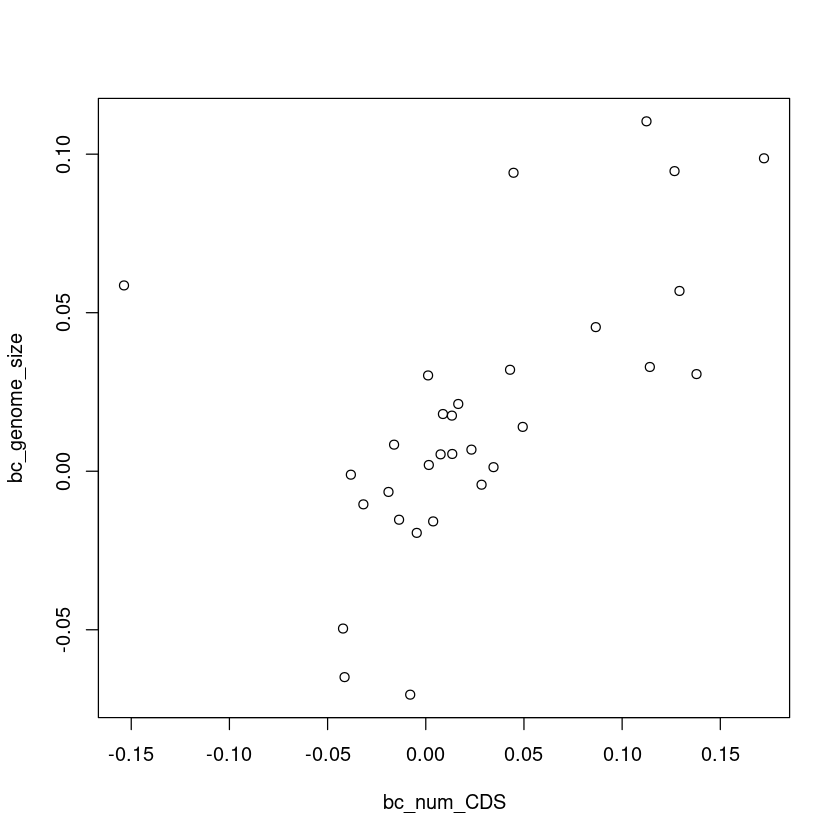

In [12]:
par(mfrow=c(1,1))
crunchTab <- caic.table(crunchMod)
plot(bc_genome_size ~ bc_num_introns + bc_num_CDS, crunchTab)

In [13]:
pdf("contrasts_num_introns_basidiomycota.pdf", width = 3.5, height = 4)
par(mfrow=c(1,1))
crunchTab <- caic.table(crunchMod)
plot(bc_genome_size ~ bc_num_introns + bc_num_CDS, crunchTab)
dev.off()

png 
  2

In [14]:
summary(crunchMod)


Call:
lm(bc_genome_size ~ bc_num_introns + bc_num_CDS - 1, data = contrData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.066272 -0.018754 -0.000967  0.008532  0.067278 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
bc_num_introns  0.07704    0.24799   0.311    0.758    
bc_num_CDS      0.53870    0.11081   4.862 4.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02768 on 28 degrees of freedom
Multiple R-squared:  0.6603,	Adjusted R-squared:  0.636 
F-statistic: 27.21 on 2 and 28 DF,  p-value: 2.725e-07


In [15]:
# correlation tests using contrasts
cor.test(crunchTab$bc_genome_size, crunchTab$bc_num_introns, method='spearman')
cor.test(crunchTab$bc_genome_size, crunchTab$bc_num_CDS, method='spearman')


	Spearman's rank correlation rho

data:  crunchTab$bc_genome_size and crunchTab$bc_num_introns
S = 1880, p-value = 0.0002615
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6209677 



	Spearman's rank correlation rho

data:  crunchTab$bc_genome_size and crunchTab$bc_num_CDS
S = 1526, p-value = 2.634e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6923387 


In [16]:
# correlation tests using the original data
cor.test(d$genome_size, d$num_introns, method='spearman')
cor.test(d$genome_size, d$num_CDS, method='spearman')

Warning message in cor.test.default(d$genome_size, d$num_introns, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  d$genome_size and d$num_introns
S = 86780, p-value = 1.42e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6576172 



	Spearman's rank correlation rho

data:  d$genome_size and d$num_CDS
S = 74112, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7075988 


In [17]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.10

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_NZ.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_NZ.UTF-8        LC_COLLATE=en_NZ.UTF-8    
 [5] LC_MONETARY=en_NZ.UTF-8    LC_MESSAGES=en_NZ.UTF-8   
 [7] LC_PAPER=en_NZ.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_NZ.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bestNormalize_1.6.1 caper_1.0.1         mvtnorm_1.1-1      
[4] MASS_7.3-53         phytools_0.7-70     maps_3.3.0         
[7] ape_5.4-1           readxl_1.3.1       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5              lubridate_1.7.9         latti